In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
%config IPCompleter.greedy=True

In [2]:
#importing dataset
df = pd.read_csv('C:/Users/Varun/Desktop/ML&AI/CarPrice_Assignment.csv')

##### <font color='Orange'>Processing the Data</font>

In [3]:
#Finding Missing Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [4]:
#Checking data
pd.set_option('display.max_columns', None)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df['CarName'] = df['CarName'].str.split(' ',expand=True)
df.rename(columns = {'CarName' : 'CarCompany'},inplace=True)
df.head(5)

,car_ID,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
#car_ID is not going to add any value in model preparation so lets drop these two columns
df.drop('car_ID',1,inplace=True)
#Taking backup of df
df_back = df
df.head(5)

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
#Checking for Unique Car names
df['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

<font color = Blue>Converting all to same case and correcting the spelling mistakes.</font>

In [8]:
df['CarCompany'] = df['CarCompany'].str.replace('maxda', 'mazda')
df['CarCompany'] = df['CarCompany'].str.replace('Nissan', 'nissan')
df['CarCompany'] = df['CarCompany'].str.replace('porcshce', 'porsche')
df['CarCompany'] = df['CarCompany'].str.replace('toyouta', 'toyota')
df['CarCompany'] = df['CarCompany'].str.replace('vokswagen', 'volkswagen')
df['CarCompany'] = df['CarCompany'].str.replace('vw', 'volkswagen')

In [9]:
df['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

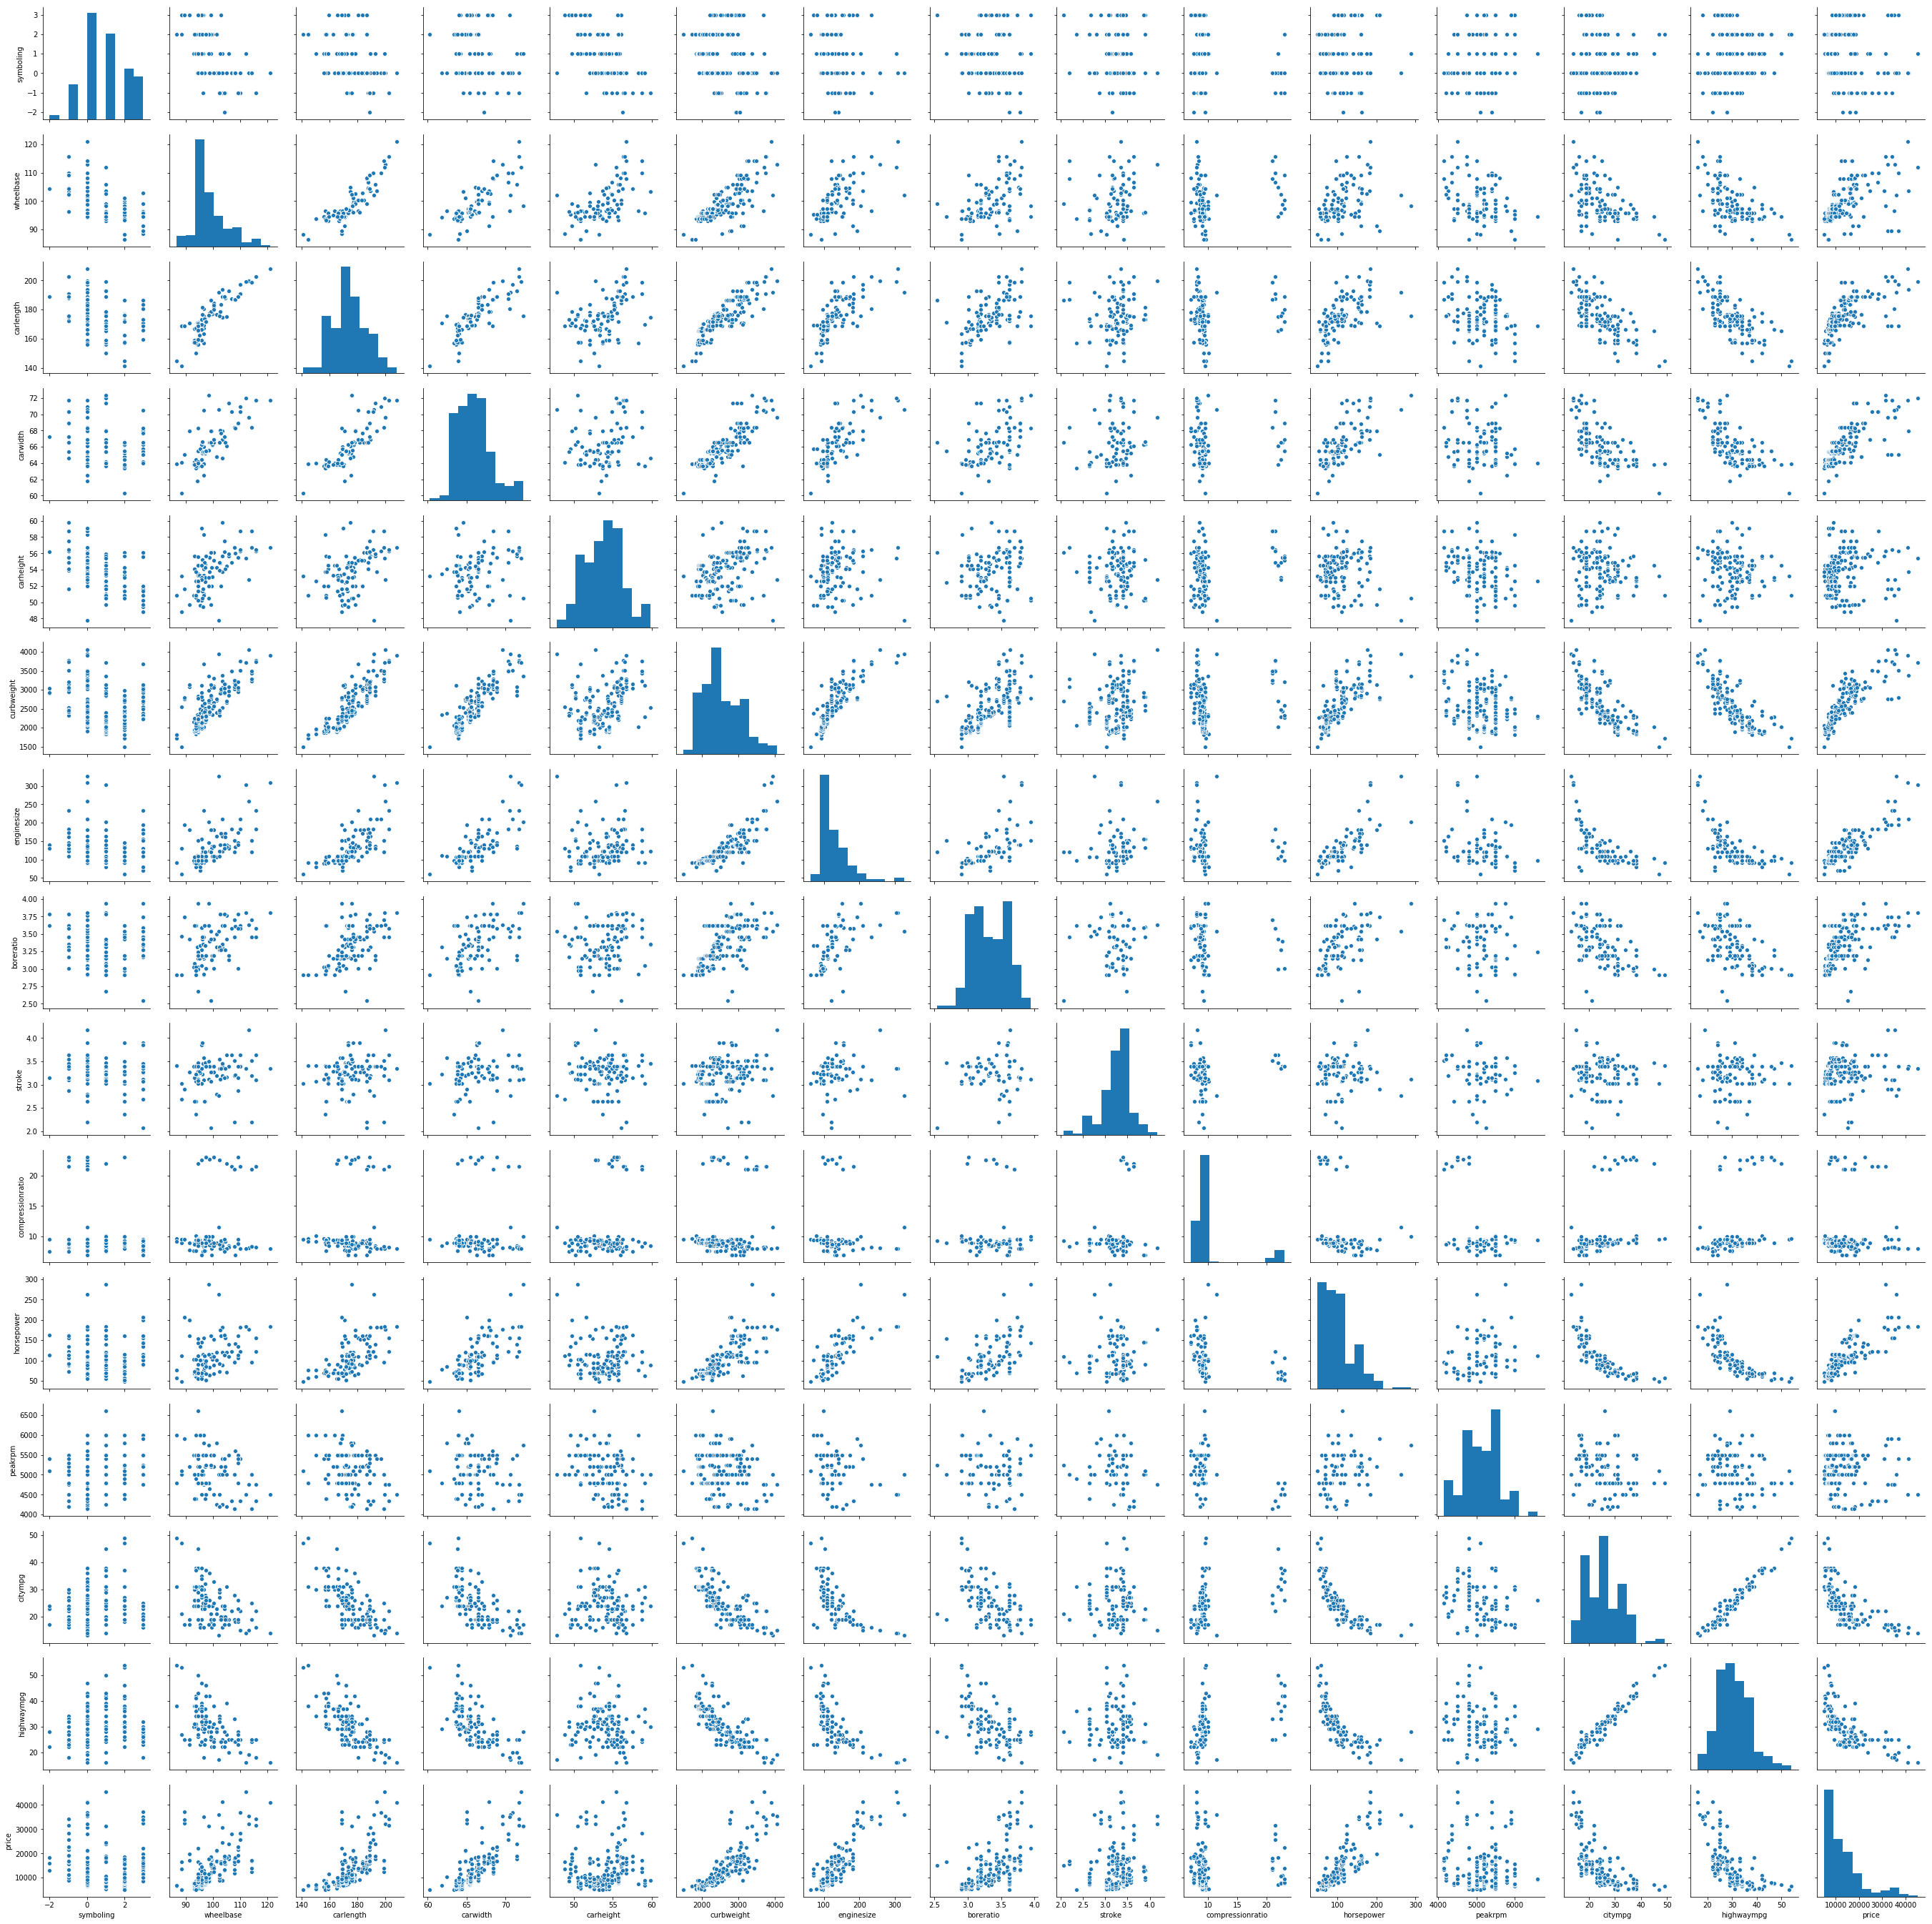

In [11]:
#Splitting dependent and independent variables
sns.pairplot(df)
plt.show()

###### <font color='black'>From the given scatter Plot we can see that Price of Car has an association with <font color='red'>carlength,car width, curbweight, engine size, horsepower</font>.So these can be possible predictors.</font>

* <font color = red>Now lets see the association with categorical variables</font>

 1.  CarCompany
 2.  fueltype
 3.  aspiration
 4.  doornumber
 5.  carbody
 6.  drivewheel
 10.  enginelocation
 11.  enginetype
 12.  cylindernumber
 13.  fuelsystem	

In [13]:
# Defining a function to plot price across categorical variables
def plot_cat(cat_var):
    plt.figure(figsize=(150,30))
    plt.subplot(2,5,1)
    sns.boxplot(x=cat_var, y='price', data=df)
    plt.show()

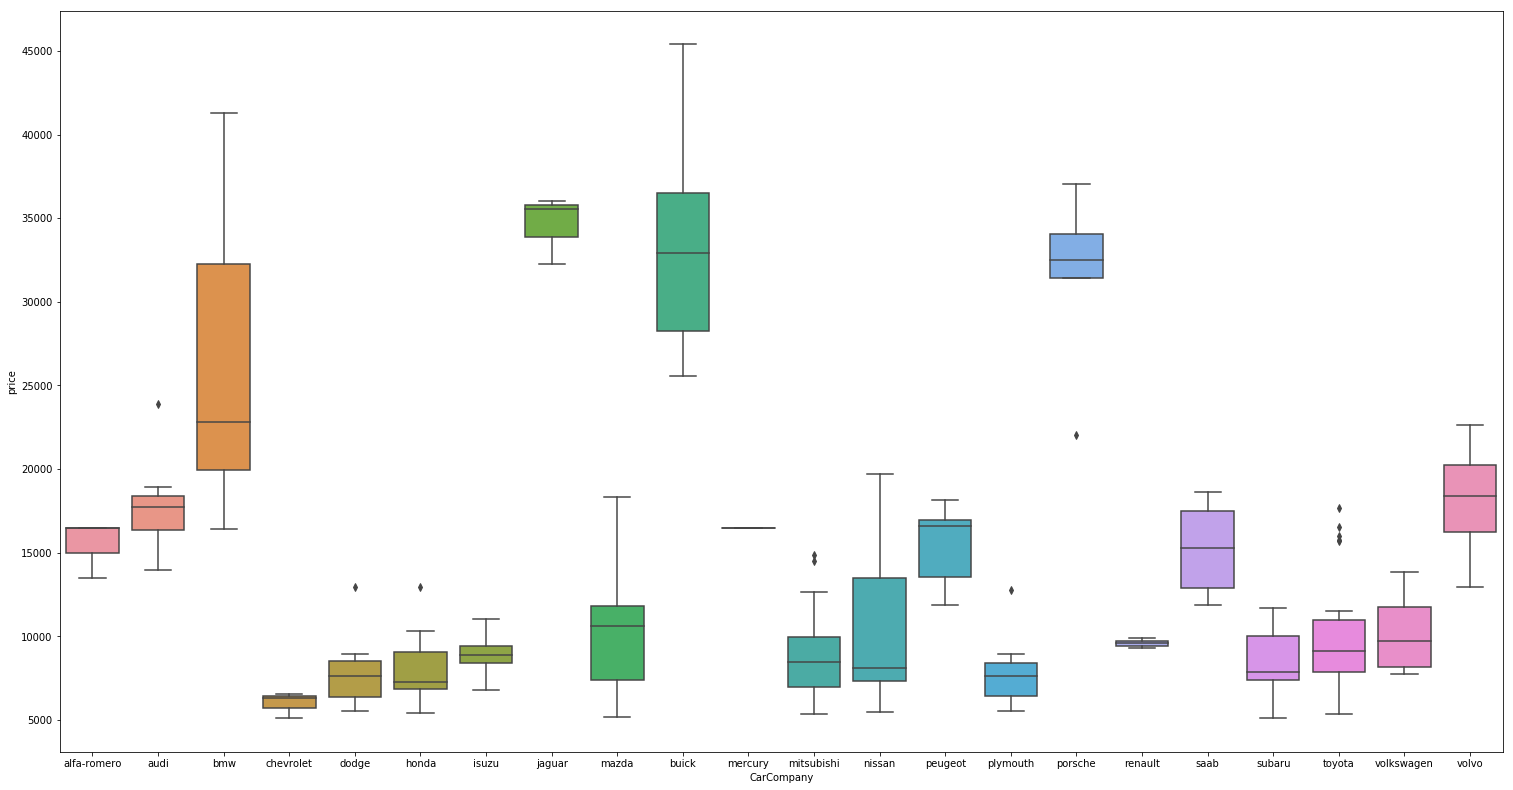

In [14]:
#Car company vs price
plot_cat('CarCompany')

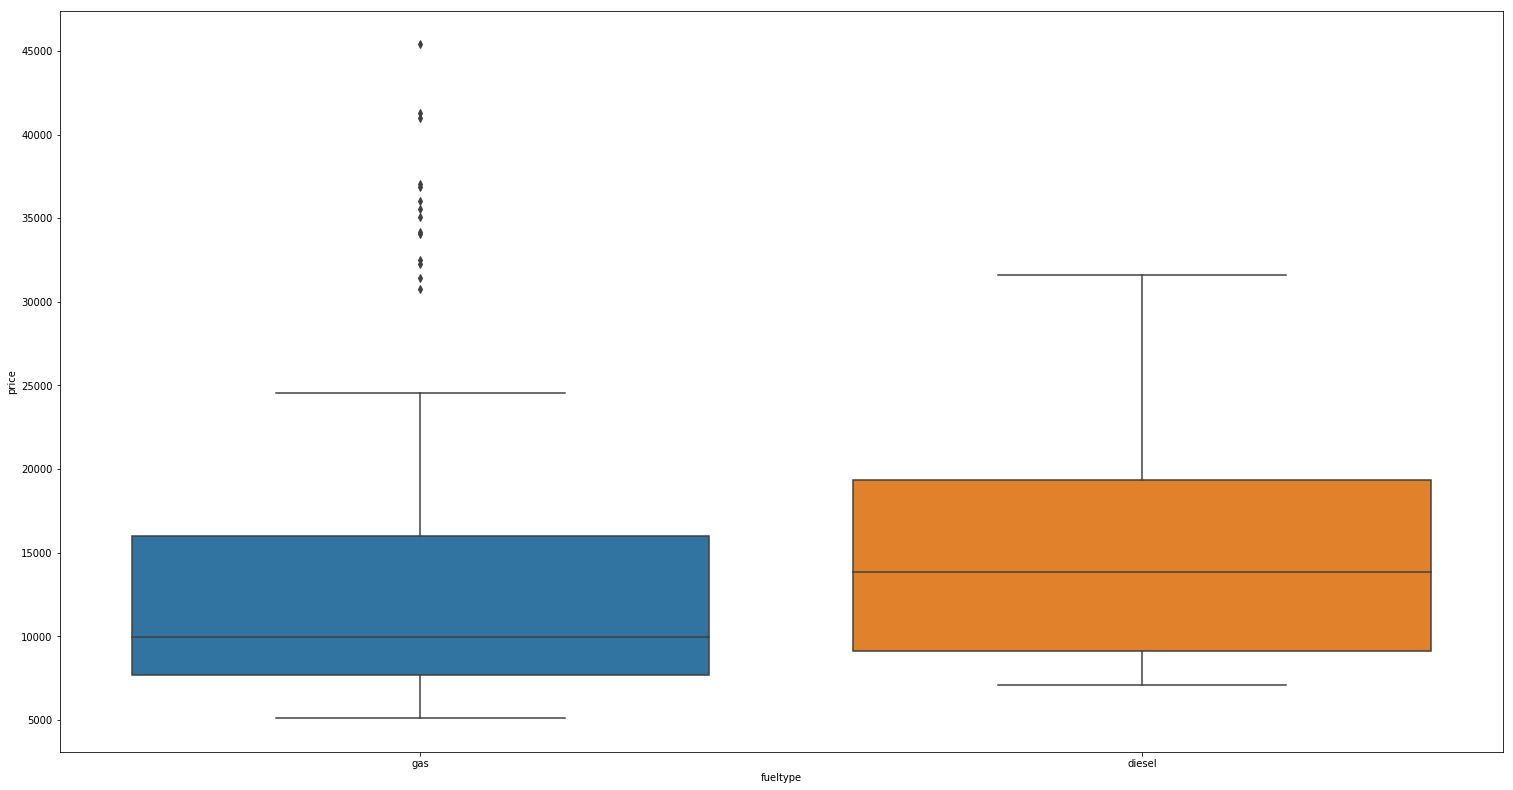

In [15]:
#Car fueltype vs price
plot_cat('fueltype')

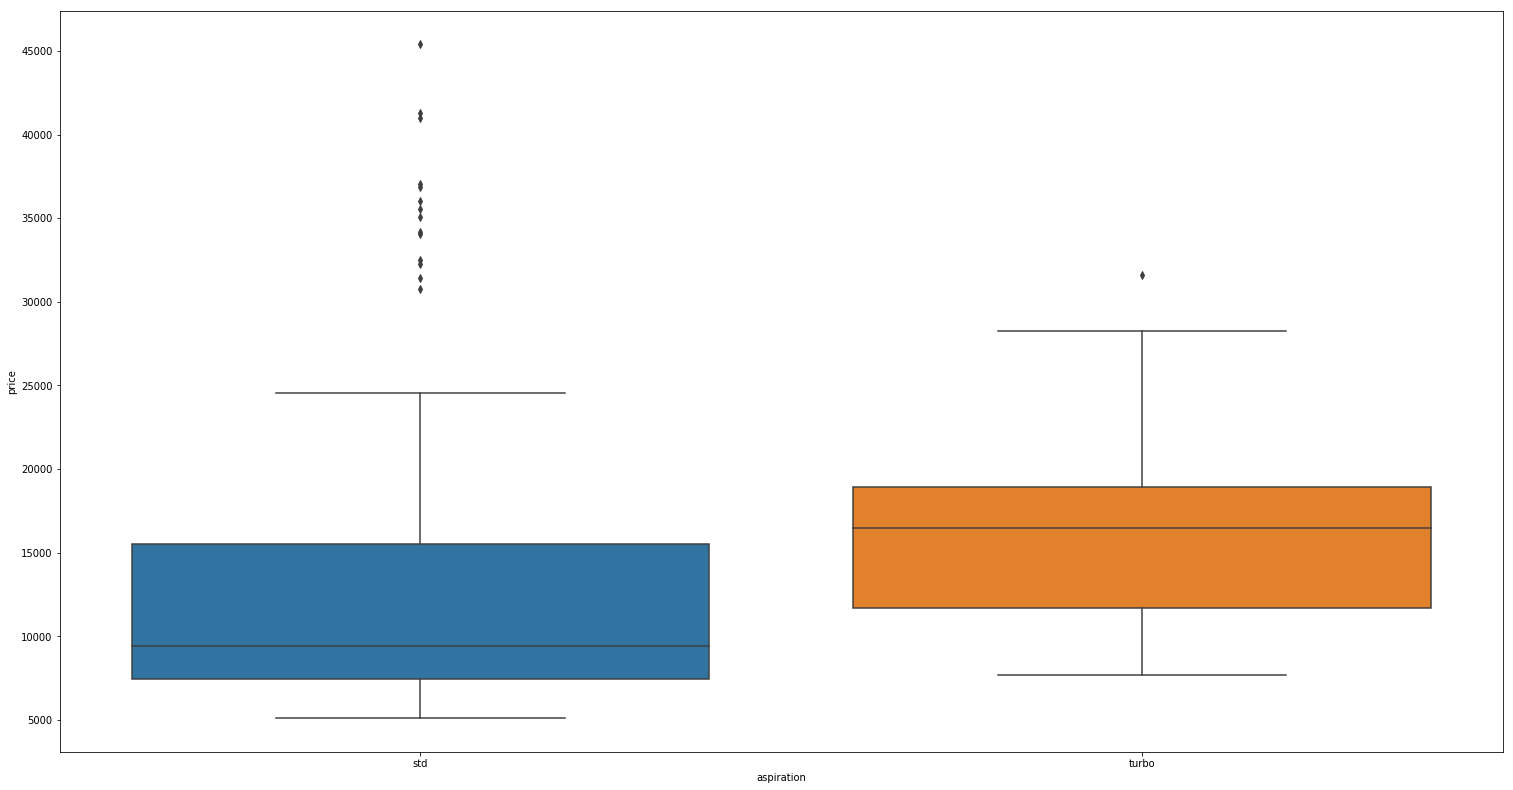

In [16]:
#Car aspiration vs price
plot_cat('aspiration')

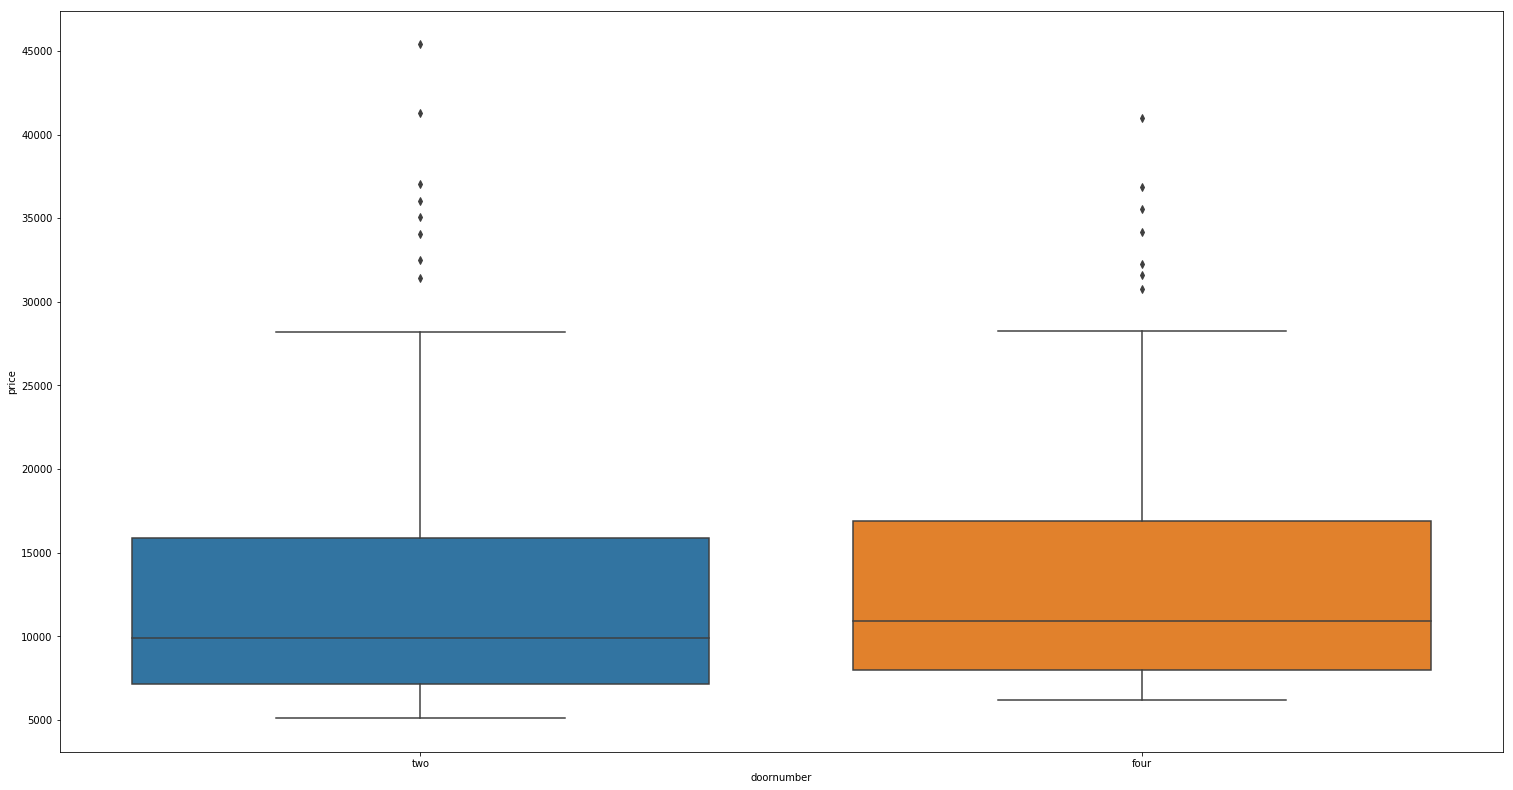

In [17]:
#Car doornumber vs price
plot_cat('doornumber')

###### <font color='blue'>The above box plot shows that there is not much varience of price when door number is two or four <font color='red'>So we will not consider door number as a predictor</font>. </font>

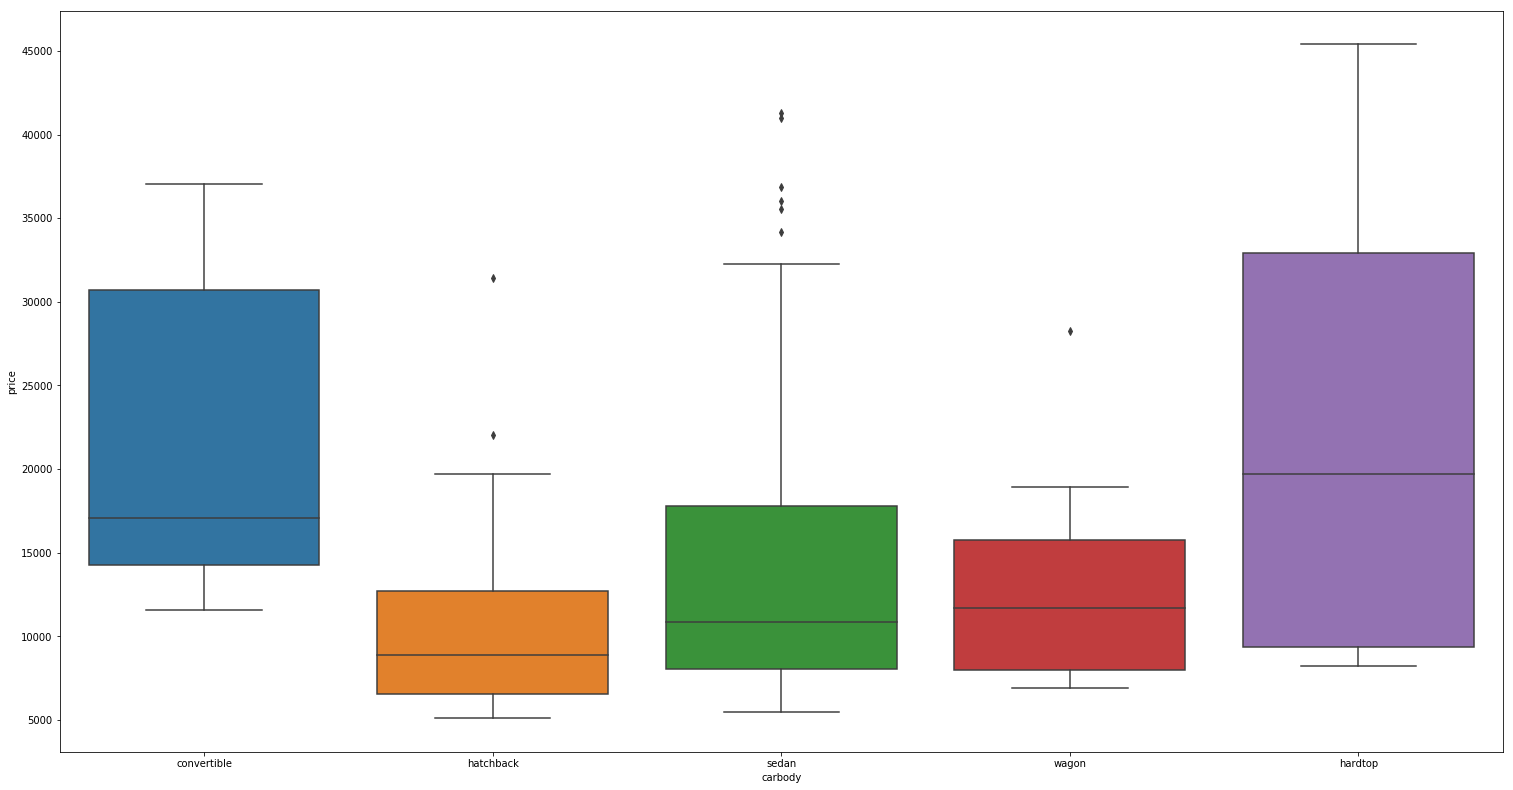

In [18]:
#Car carbody vs price
plot_cat('carbody')

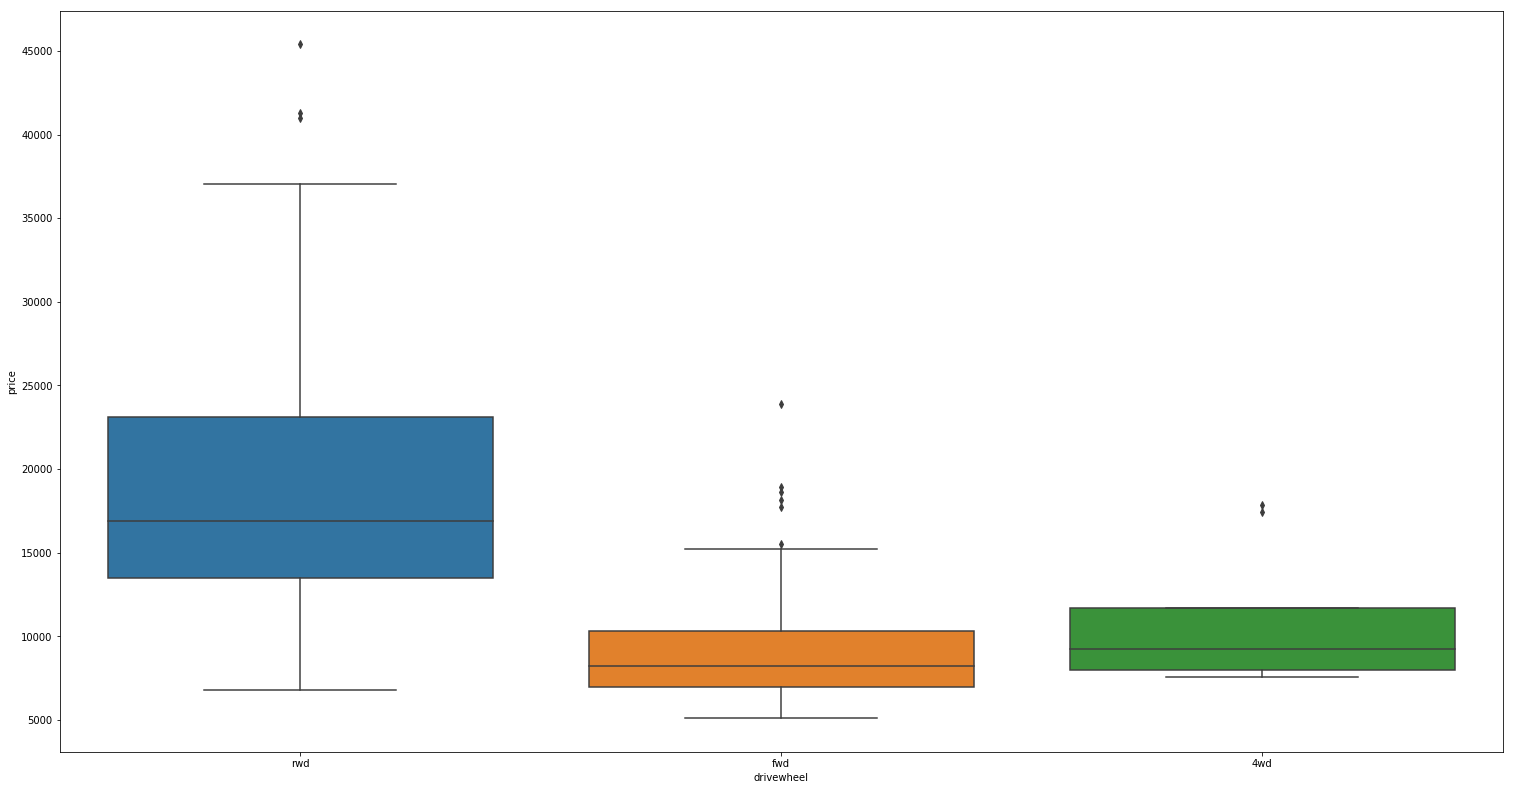

In [19]:
#Car drivewheel vs price
plot_cat('drivewheel')

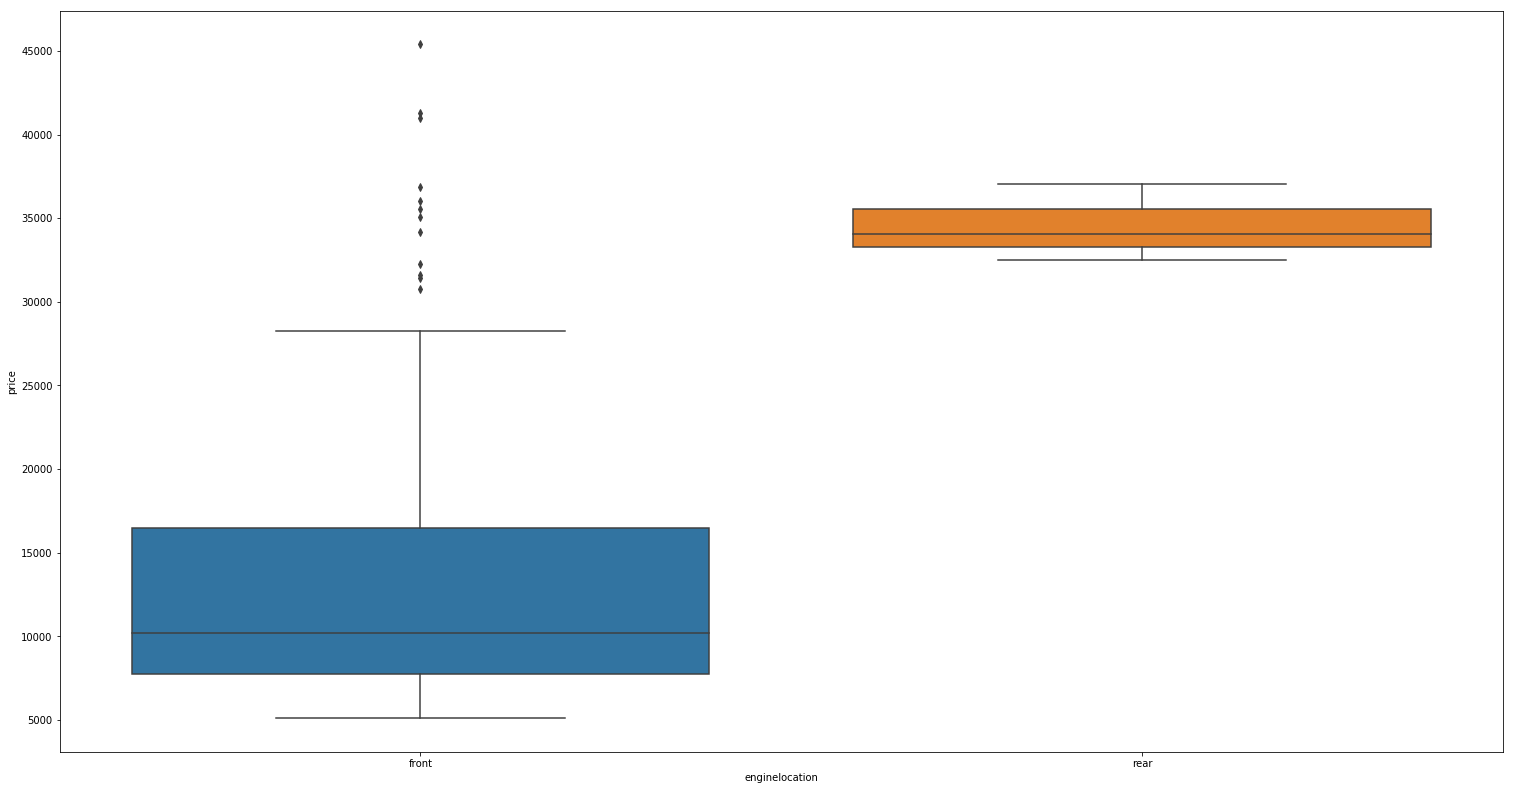

In [20]:
#Car enginelocation vs price
plot_cat('enginelocation')

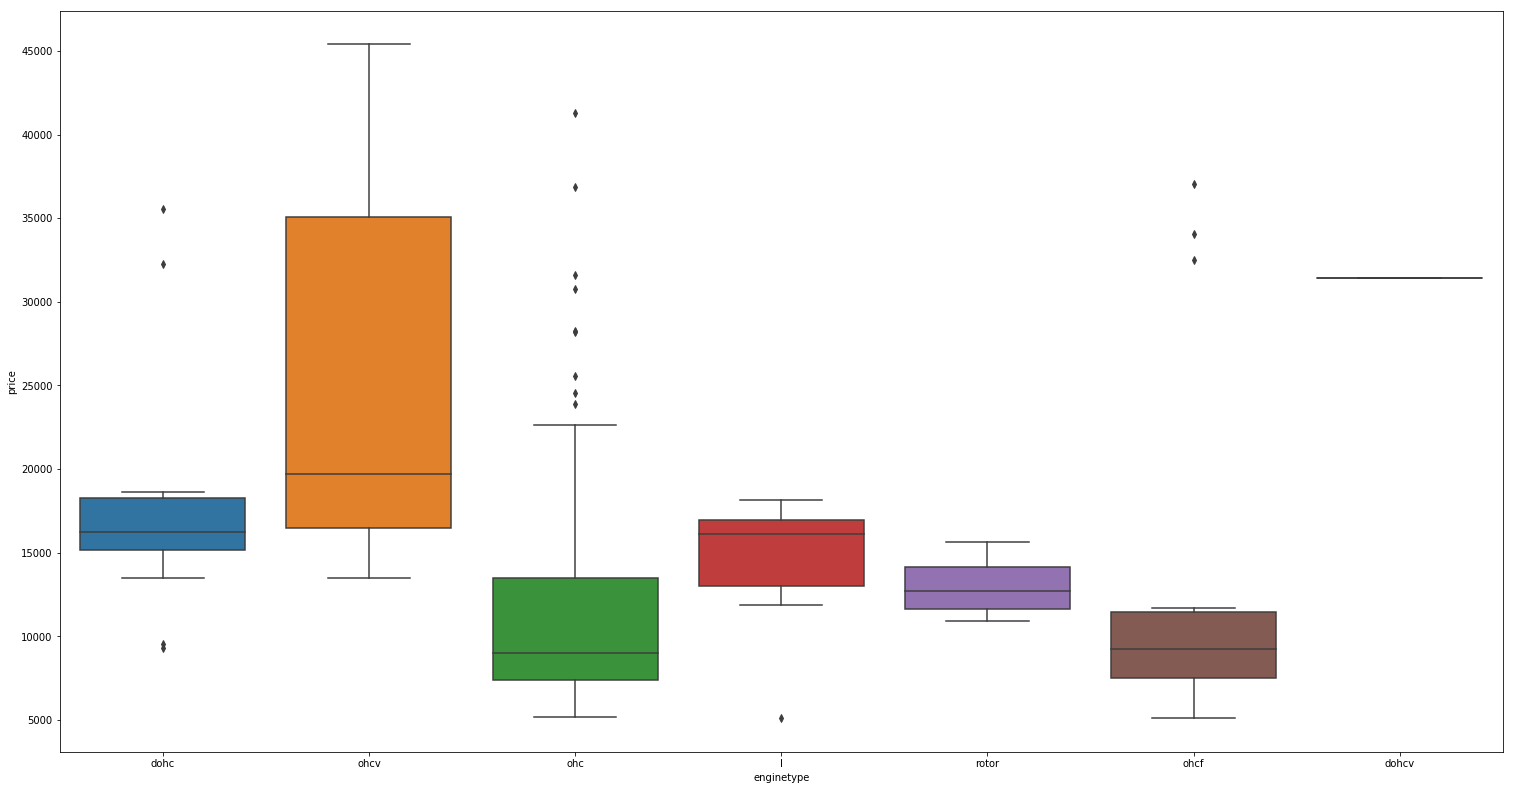

In [21]:
#Car enginetype vs price
plot_cat('enginetype')

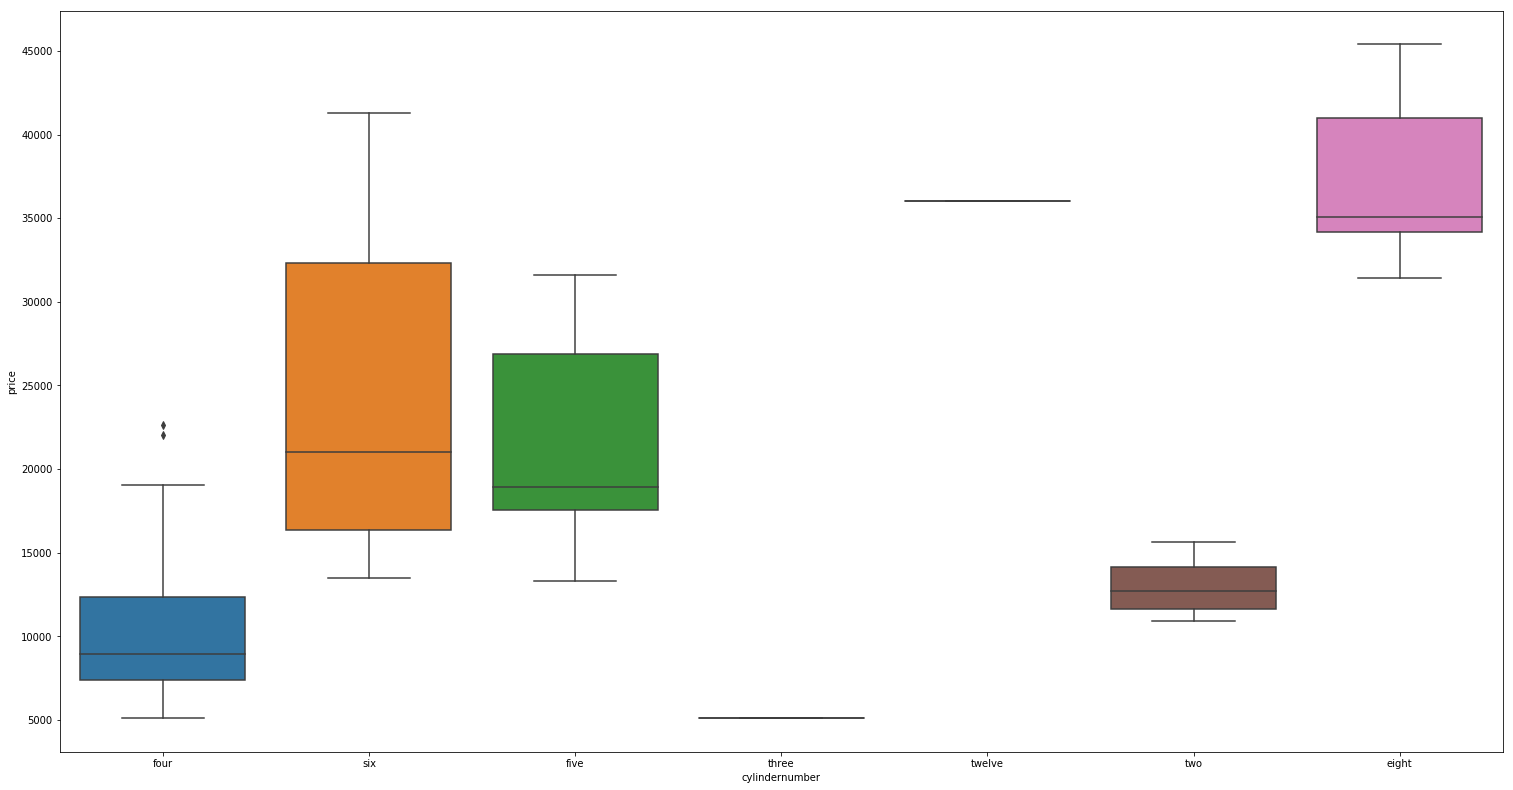

In [22]:
#Car cylindernumber vs price
plot_cat('cylindernumber')

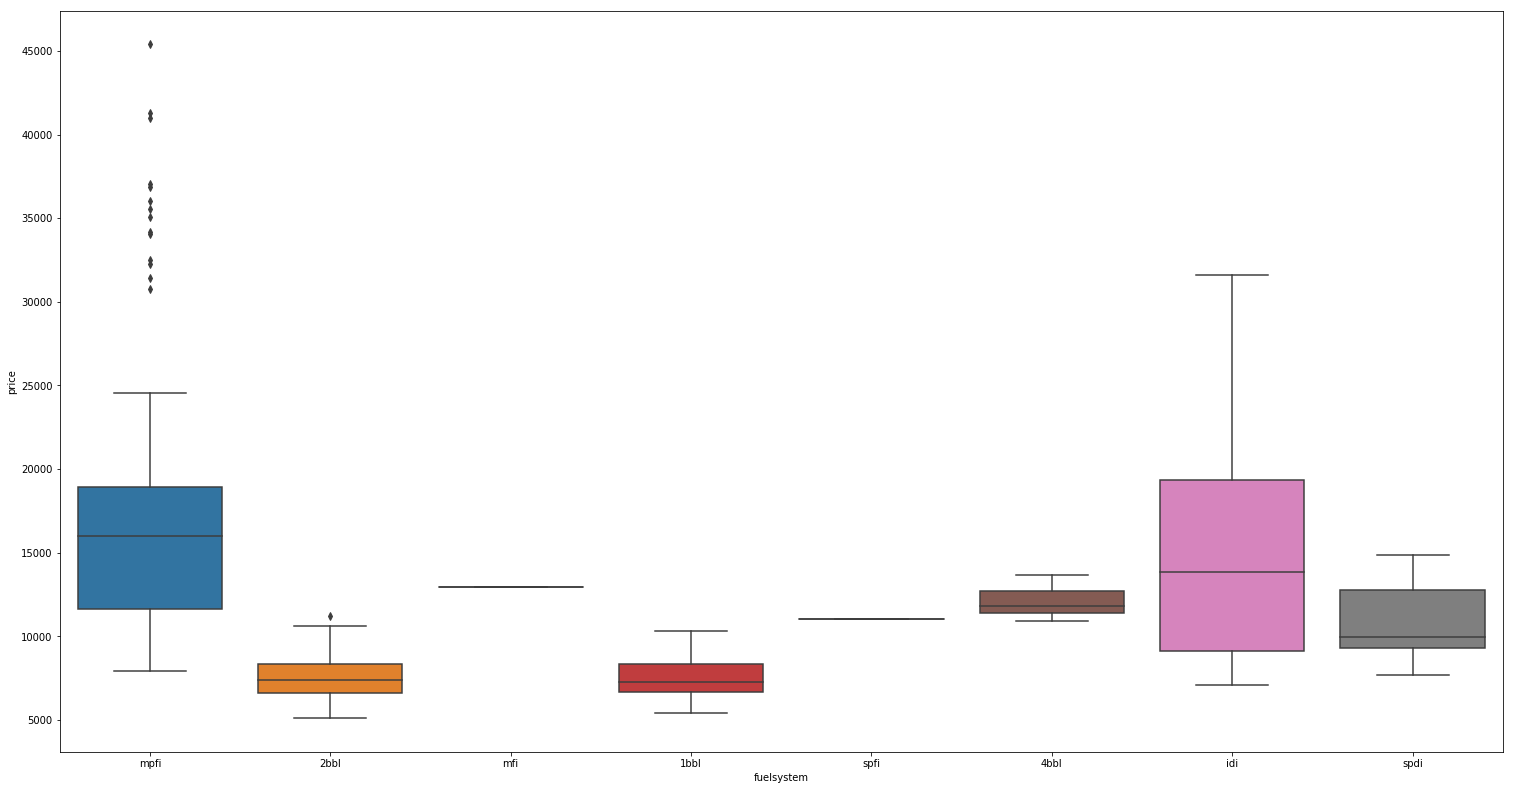

In [23]:
#Car fuelsystem vs price
plot_cat('fuelsystem')

In [24]:
# Dropping doornumber  
df.drop('doornumber',1,inplace=True)
df.head(5)

,symboling,CarCompany,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


##### Data preparation

In [25]:
#Taking Car_dataset from df
car_dataset  = df

In [26]:
#Let's make make values numeric wherever applicable
#varlist = ['doornumber','cylindernumber']
varlist = ['cylindernumber']
def string_to_num(x):
    return x.map({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})

#applying the function to car_dataset
car_dataset[varlist] = car_dataset[varlist].apply(string_to_num)

In [27]:
#Let's make make values binary where categorical variables are within two types
#varlist_binary = ['fueltype','aspiration','enginelocation']
varlist_binary = ['fueltype','aspiration','enginelocation']
def binary_map(x):
    return x.map({'diesel':1,'gas':0,'turbo':1,'std':0,'front':0,'rear':1})

#applying the function to car_dataset
car_dataset[varlist_binary] = car_dataset[varlist_binary].apply(binary_map)

In [28]:
df.head()

,symboling,CarCompany,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,0,0,hatchback,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,0,0,sedan,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,0,0,sedan,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


###### <font color='black'>So we are now left with <font color='green'>CarCompany,carbody, drivewheel, enginetype, fuelsystem</font> categorical variables which are non numeric</font>

###### Creating dummy encoding for categorical variables which has level more than 2.

In [29]:
#Encoding dummies for CarCompany
#CarCompany = pd.get_dummies(car_dataset['CarCompany'],drop_first=True)
#adding it to actual dataset 
#car_dataset = pd.concat([car_dataset,CarCompany],axis = 1)
#dropping CarCompany as we got dummies for it
#Simply dropping car company as RFE kepy on selecting car company
car_dataset.drop('CarCompany',1,inplace=True)
car_dataset.head()

,symboling,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,0,hatchback,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,0,0,sedan,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,0,0,sedan,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [30]:
#Encoding dummies for carbody
carbody = pd.get_dummies(car_dataset['carbody'],drop_first=True)
#adding it to actual dataset 
car_dataset = pd.concat([car_dataset,carbody],axis = 1)
#dropping carbody as we got dummies for it
car_dataset.drop('carbody',1,inplace=True)
car_dataset.head()

,symboling,fueltype,aspiration,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon
0,3,0,0,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0
1,3,0,0,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0
2,1,0,0,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0
3,2,0,0,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0
4,2,0,0,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0


In [31]:
#Encoding dummies for drivewheel
drivewheel = pd.get_dummies(car_dataset['drivewheel'],drop_first=True)
#adding it to actual dataset 
car_dataset = pd.concat([car_dataset,drivewheel],axis = 1)
#dropping drivewheel as we got dummies for it
car_dataset.drop('drivewheel',1,inplace=True)
car_dataset.head()


,symboling,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,fwd,rwd
0,3,0,0,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,1
1,3,0,0,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,1
2,1,0,0,0,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0,0,1
3,2,0,0,0,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,1,0
4,2,0,0,0,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,0,0


In [32]:
#Encoding dummies for enginetype
enginetype = pd.get_dummies(car_dataset['enginetype'],drop_first=True)
#adding it to actual dataset 
car_dataset = pd.concat([car_dataset,enginetype],axis = 1)
#dropping enginetype as we got dummies for it
car_dataset.drop('enginetype',1,inplace=True)
car_dataset.head()

,symboling,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor
0,3,0,0,0,88.6,168.8,64.1,48.8,2548,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,1,0,0,0,0,0,0
1,3,0,0,0,88.6,168.8,64.1,48.8,2548,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,94.5,171.2,65.5,52.4,2823,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0,0,1,0,0,0,0,1,0
3,2,0,0,0,99.8,176.6,66.2,54.3,2337,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,1,0,0,0,1,0,0,0
4,2,0,0,0,99.4,176.6,66.4,54.3,2824,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,0,0,0,0,1,0,0,0


In [33]:
#Encoding dummies for fuelsystem
fuelsystem = pd.get_dummies(car_dataset['fuelsystem'],drop_first=True)
#adding it to actual dataset 
car_dataset = pd.concat([car_dataset,fuelsystem],axis = 1)
#dropping fuelsystem as we got dummies for it
car_dataset.drop('fuelsystem',1,inplace=True)
car_dataset.head()

,symboling,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,0,0,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,0,0,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,2,0,0,0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,2,0,0,0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [34]:
car_dataset.head()

,symboling,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,0,0,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,0,0,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,2,0,0,0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,2,0,0,0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [35]:
#Copying this to master data
car_master = car_dataset

In [36]:
car_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 38 columns):
symboling           205 non-null int64
fueltype            205 non-null int64
aspiration          205 non-null int64
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
cylindernumber      205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
hardtop             205 non-null uint8
hatchback           205 non-null uint8
sedan               205 non-null uint8
wagon               2

In [37]:
#Taking a safe CSV from car_master
car_master.to_csv("car_master.csv",encoding='utf-8', index=False)

In [38]:
#Shifting the target column at the end
car_master['price_dup'] = car_master['price']
car_master.drop('price',1,inplace=True)
car_master.rename(columns = {'price_dup' : 'price'}, inplace=True)
car_master.head()

,symboling,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,price
0,3,0,0,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,13495.0
1,3,0,0,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,16500.0
2,1,0,0,0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,16500.0
3,2,0,0,0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,13950.0
4,2,0,0,0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,17450.0


In [39]:
#Saving the DF in a seperate csv.
car_master.to_csv("car_master.csv",encoding='utf-8', index=False)

### Setting up model

In [40]:
#creating training and test set
from sklearn.model_selection import train_test_split
np.random.seed(0)
car_master_train, car_master_test = train_test_split(car_master, train_size = 0.7, test_size = 0.3, random_state = 100)

In [41]:
#Using min max scaling to standardize all the variables in car_master dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [42]:
#now going to apply minmaxscaller too all variables except dummies and 'fueltype','aspiration','enginelocation'
#varlist_scaler = ['symboling','doornumber','wheelbase','carlength','carwidth', 'carheight','curbweight','cylindernumber',
                 #'enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
    
varlist_scaler = ['symboling','wheelbase','carlength','carwidth', 'carheight','curbweight','cylindernumber',
                 'enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']



In [43]:
car_master_train[varlist_scaler] = scaler.fit_transform(car_master_train[varlist_scaler])

C:\Users\Varun\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Varun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Varun\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [44]:
#car_master_train.to_csv("car_master_train.csv",encoding='utf-8', index=False)
car_master_train.drop('mfi',1,inplace=True)
car_master_train.drop('spfi',1,inplace=True)

C:\Users\Varun\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [45]:
car_master_train.head()

,symboling,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mpfi,spdi,price
122,0.6,0,0,0,0.244828,0.426016,0.291667,0.265487,0.272692,0.2,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0.068818
125,1.0,0,0,0,0.272414,0.452033,0.666667,0.212389,0.500388,0.2,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0.466890
166,0.6,0,0,0,0.272414,0.448780,0.308333,0.424779,0.314973,0.2,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.122110
1,1.0,0,0,0,0.068966,0.450407,0.316667,0.088496,0.411171,0.2,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.314446
199,0.2,0,1,0,0.610345,0.775610,0.575000,0.858407,0.647401,0.2,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0.382131


In [46]:
car_master_train.describe()

,symboling,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mpfi,spdi,price
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.090909,0.181818,0.006993,0.411141,0.525476,0.461655,0.509004,0.407878,0.240559,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.349650,0.020979,0.090909,0.440559,0.041958,0.219310
std,0.239200,0.288490,0.387050,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,0.115818,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.478536,0.143818,0.288490,0.498199,0.201198,0.215682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.000000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.200000,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067298
50%,0.600000,0.000000,0.000000,0.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.200000,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140343
75%,0.600000,0.000000,0.000000,0.000000,0.503448,0.669919,0.550000,0.668142,0.559542,0.200000,0.301887,0.682540,0.611111,0.150000,0.283333,0.551020,0.500000,0.527027,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.313479
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
car_master_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 36 columns):
symboling           143 non-null float64
fueltype            143 non-null int64
aspiration          143 non-null int64
enginelocation      143 non-null int64
wheelbase           143 non-null float64
carlength           143 non-null float64
carwidth            143 non-null float64
carheight           143 non-null float64
curbweight          143 non-null float64
cylindernumber      143 non-null float64
enginesize          143 non-null float64
boreratio           143 non-null float64
stroke              143 non-null float64
compressionratio    143 non-null float64
horsepower          143 non-null float64
peakrpm             143 non-null float64
citympg             143 non-null float64
highwaympg          143 non-null float64
hardtop             143 non-null uint8
hatchback           143 non-null uint8
sedan               143 non-null uint8
wagon               143 non-null uint8
fwd    

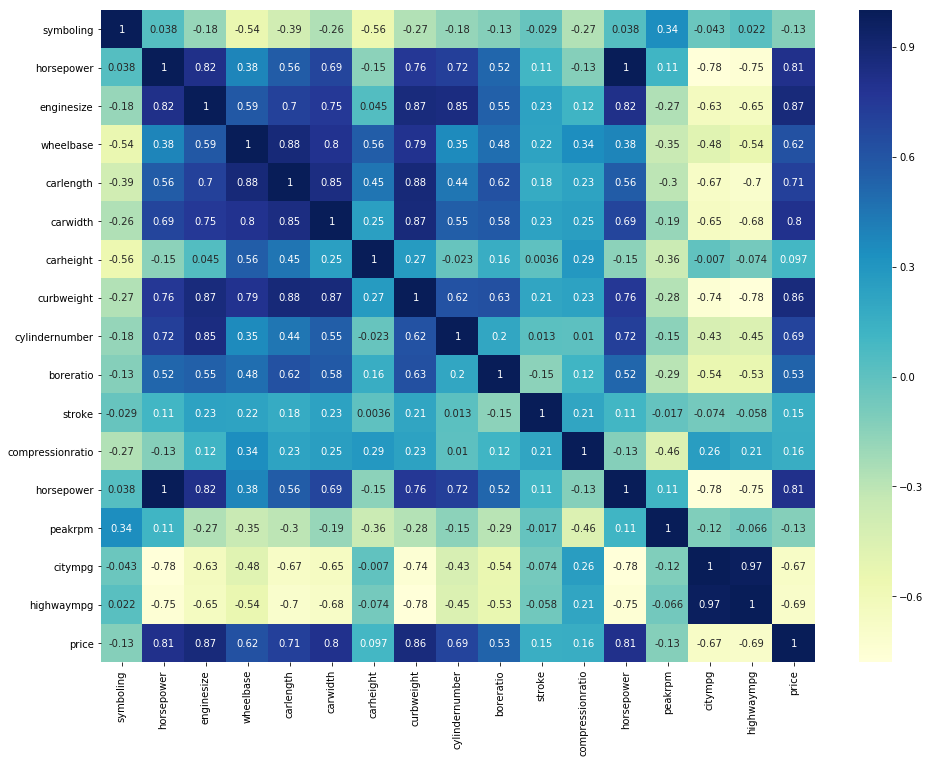

In [48]:
# Checking the correlation coefficient to check which variables are highly corelated

plt.figure(figsize = (16, 12))
sns.heatmap(car_master_train[['symboling','horsepower','enginesize','wheelbase',
                              'carlength','carwidth','carheight','curbweight','cylindernumber',
                              'boreratio','stroke','compressionratio','horsepower','peakrpm',
                              'citympg','highwaympg','price']].corr(), annot = True, cmap="YlGnBu")
plt.show()

as we can see horsepower, enginesize, carwidth, curbweight seems to be correlated with price. 
Let's check these in pairplots

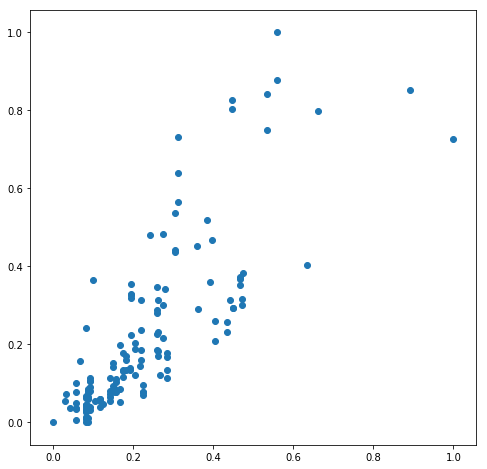

In [49]:
#defining a functionto vizualize these in pair plots
plt.figure(figsize=[8,8])
plt.scatter(car_master_train.horsepower, car_master_train.price)
plt.show()

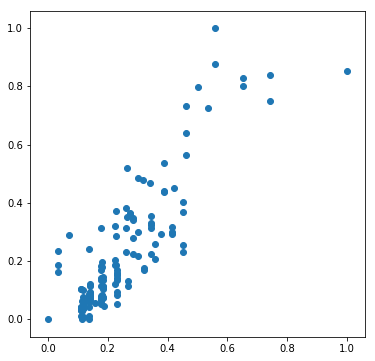

In [50]:
#defining a functionto vizualize these in pair plots
plt.figure(figsize=[6,6])
plt.scatter(car_master_train.enginesize, car_master_train.price)
plt.show()

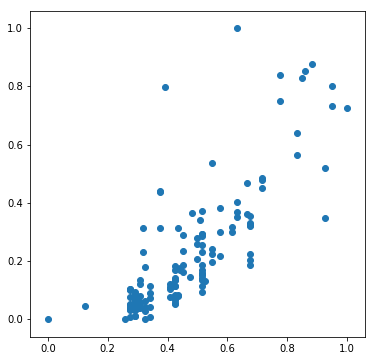

In [51]:
#defining a functionto vizualize these in pair plots
plt.figure(figsize=[6,6])
plt.scatter(car_master_train.carwidth, car_master_train.price)
plt.show()

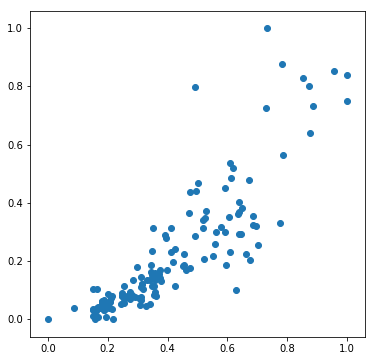

In [52]:
#defining a functionto vizualize these in pair plots
plt.figure(figsize=[6,6])
plt.scatter(car_master_train.curbweight, car_master_train.price)
plt.show()

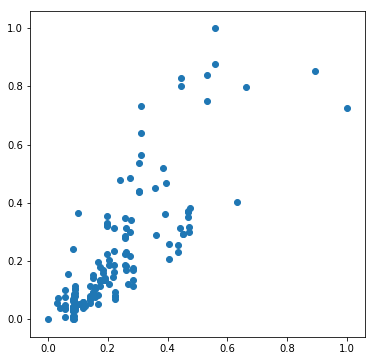

In [53]:
#defining a functionto vizualize these in pair plots
plt.figure(figsize=[6,6])
plt.scatter(car_master_train.horsepower, car_master_train.price)
plt.show()

### Model building

In [56]:
#taking X and Y set for model building
Y_train = car_master_train.pop('price')
X_train = car_master_train

KeyError: 'price'

#### Building linear model

In [57]:
#Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [ ]:
#X_train.info()
#36 columns

In [58]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
rfe = RFE(lm, 36)
rfe = rfe.fit(X_train, Y_train)

In [59]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', True, 1),
 ('fueltype', True, 1),
 ('aspiration', True, 1),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', True, 1),
 ('highwaympg', True, 1),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', True, 1),
 ('rwd', True, 1),
 ('dohcv', True, 1),
 ('l', True, 1),
 ('ohc', True, 1),
 ('ohcf', True, 1),
 ('ohcv', True, 1),
 ('rotor', True, 1),
 ('2bbl', True, 1),
 ('4bbl', True, 1),
 ('idi', True, 1),
 ('mpfi', True, 1),
 ('spdi', True, 1)]

In [60]:
col = X_train.columns[rfe.support_]
col

Index(['symboling', 'fueltype', 'aspiration', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor',
       '2bbl', '4bbl', 'idi', 'mpfi', 'spdi'],
      dtype='object')

In [61]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

In [62]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [63]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [65]:
lm = sm.OLS(Y_train,X_train_rfe).fit()   # Running the linear model

In [66]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     41.58
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           7.07e-48
Time:                        17:05:32   Log-Likelihood:                 206.11
No. Observations:                 143   AIC:                            -342.2
Df Residuals:                     108   BIC:                            -238.5
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0940      0.136  

##### Rebuilding the model

In [67]:
X_train_new = X_train_rfe.drop(["l"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm 
X_train_rfe = X_train[col]
X_train_lm = sm.add_constant(X_train_new)

In [68]:
lm = sm.OLS(Y_train,X_train_lm).fit()   # Running the linear model|

In [69]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     43.23
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           1.08e-48
Time:                        17:05:45   Log-Likelihood:                 206.09
No. Observations:                 143   AIC:                            -344.2
Df Residuals:                     109   BIC:                            -243.4
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0947      0.135  

In [ ]:
#Rebuilding the model


In [70]:
#removing variables having high no of P values and r
X_train_new2 = X_train_rfe.drop(['l','carlength'], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new2)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     44.98
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           1.60e-49
Time:                        17:05:51   Log-Likelihood:                 206.08
No. Observations:                 143   AIC:                            -346.2
Df Residuals:                     110   BIC:                            -248.4
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0960      0.134  

In [71]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     44.98
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           1.60e-49
Time:                        17:05:57   Log-Likelihood:                 206.08
No. Observations:                 143   AIC:                            -346.2
Df Residuals:                     110   BIC:                            -248.4
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0960      0.134  

In [72]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','citympg'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     46.83
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           2.38e-50
Time:                        17:06:03   Log-Likelihood:                 206.04
No. Observations:                 143   AIC:                            -348.1
Df Residuals:                     111   BIC:                            -253.3
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1000      0.132  

In [73]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','citympg','4bbl'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     48.78
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           3.53e-51
Time:                        17:06:09   Log-Likelihood:                 205.98
No. Observations:                 143   AIC:                            -350.0
Df Residuals:                     112   BIC:                            -258.1
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0985      0.132  

In [74]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','citympg','4bbl','fwd'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     50.87
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           5.09e-52
Time:                        17:06:17   Log-Likelihood:                 205.93
No. Observations:                 143   AIC:                            -351.9
Df Residuals:                     113   BIC:                            -263.0
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1071      0.128  

In [75]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','citympg','4bbl','2bbl'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     50.81
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           5.46e-52
Time:                        17:06:25   Log-Likelihood:                 205.84
No. Observations:                 143   AIC:                            -351.7
Df Residuals:                     113   BIC:                            -262.8
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0794      0.125  

In [76]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','citympg','4bbl','fwd','2bbl','mpfi'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     55.43
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           1.08e-53
Time:                        17:06:31   Log-Likelihood:                 205.71
No. Observations:                 143   AIC:                            -355.4
Df Residuals:                     115   BIC:                            -272.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0888      0.121  

In [78]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','citympg','4bbl','fwd','2bbl','mpfi','ohcv'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     57.61
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           2.12e-54
Time:                        17:08:57   Log-Likelihood:                 205.20
No. Observations:                 143   AIC:                            -356.4
Df Residuals:                     116   BIC:                            -276.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0977      0.120  

In [79]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     57.61
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           2.12e-54
Time:                        17:09:38   Log-Likelihood:                 205.20
No. Observations:                 143   AIC:                            -356.4
Df Residuals:                     116   BIC:                            -276.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0977      0.120  

In [80]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     59.42
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           6.64e-55
Time:                        17:10:27   Log-Likelihood:                 204.08
No. Observations:                 143   AIC:                            -356.2
Df Residuals:                     117   BIC:                            -279.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0201      0.106  

In [81]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     61.36
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           2.10e-55
Time:                        17:13:20   Log-Likelihood:                 202.93
No. Observations:                 143   AIC:                            -355.9
Df Residuals:                     118   BIC:                            -281.8
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0307      0.106  

In [82]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype','compressionratio'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     64.46
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           2.84e-56
Time:                        17:13:30   Log-Likelihood:                 202.82
No. Observations:                 143   AIC:                            -357.6
Df Residuals:                     119   BIC:                            -286.5
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0165      0.101     -0.

In [83]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype','compressionratio','spdi'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     65.72
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           2.12e-56
Time:                        17:13:36   Log-Likelihood:                 200.61
No. Observations:                 143   AIC:                            -355.2
Df Residuals:                     120   BIC:                            -287.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0284      0.102     -0.

In [84]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype','compressionratio','spdi','wheelbase'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     67.47
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           1.20e-56
Time:                        17:13:42   Log-Likelihood:                 198.73
No. Observations:                 143   AIC:                            -353.5
Df Residuals:                     121   BIC:                            -288.3
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0106      0.100      0.

In [85]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype','compressionratio','spdi','wheelbase','symboling'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     70.27
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           3.46e-57
Time:                        17:13:49   Log-Likelihood:                 197.65
No. Observations:                 143   AIC:                            -353.3
Df Residuals:                     122   BIC:                            -291.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0680      0.091      0.

In [86]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype','compressionratio','spdi','wheelbase','symboling',
                               'highwaympg'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     72.29
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           2.25e-57
Time:                        17:13:54   Log-Likelihood:                 195.61
No. Observations:                 143   AIC:                            -351.2
Df Residuals:                     123   BIC:                            -292.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1538      0.080      1.

In [87]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype','compressionratio','spdi','wheelbase','symboling',
                               'highwaympg','peakrpm'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     74.99
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           1.05e-57
Time:                        17:14:00   Log-Likelihood:                 193.93
No. Observations:                 143   AIC:                            -349.9
Df Residuals:                     124   BIC:                            -293.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1907      0.077      2.

In [112]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,4.14
3,rwd,3.08
5,ohc,1.80
0,aspiration,1.25
6,rotor,1.21
1,enginelocation,1.04
4,dohcv,1.04


In [90]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype','compressionratio','spdi','wheelbase','symboling',
                               'highwaympg','peakrpm','carwidth'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     65.86
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           6.50e-54
Time:                        17:14:19   Log-Likelihood:                 181.27
No. Observations:                 143   AIC:                            -326.5
Df Residuals:                     125   BIC:                            -273.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1804      0.084      2.

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [91]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype','compressionratio','spdi','wheelbase','symboling',
                               'highwaympg','peakrpm','carwidth','carheight'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     61.10
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           2.21e-51
Time:                        17:14:25   Log-Likelihood:                 172.10
No. Observations:                 143   AIC:                            -310.2
Df Residuals:                     126   BIC:                            -259.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2201      0.089      2.

In [92]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype','compressionratio','spdi','wheelbase','symboling',
                               'highwaympg','peakrpm','carwidth','carheight','hardtop'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     64.09
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           1.05e-51
Time:                        17:14:30   Log-Likelihood:                 170.55
No. Observations:                 143   AIC:                            -309.1
Df Residuals:                     127   BIC:                            -261.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2134      0.089      2.

In [93]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype','compressionratio','spdi','wheelbase','symboling',
                               'highwaympg','peakrpm','carwidth','carheight','hardtop','hatchback'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     68.73
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           1.81e-52
Time:                        17:14:35   Log-Likelihood:                 170.11
No. Observations:                 143   AIC:                            -310.2
Df Residuals:                     128   BIC:                            -265.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1980      0.088      2.

In [94]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype','compressionratio','spdi','wheelbase','symboling',
                               'highwaympg','peakrpm','carwidth','carheight','hardtop','hatchback','horsepower'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     72.96
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           7.15e-53
Time:                        17:14:41   Log-Likelihood:                 168.71
No. Observations:                 143   AIC:                            -309.4
Df Residuals:                     129   BIC:                            -267.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1973      0.088      2.

In [95]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype','compressionratio','spdi','wheelbase','symboling',
                               'highwaympg','peakrpm','carwidth','carheight','hardtop','hatchback','horsepower',
                               'ohcf'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     78.86
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           1.37e-53
Time:                        17:14:47   Log-Likelihood:                 168.09
No. Observations:                 143   AIC:                            -310.2
Df Residuals:                     130   BIC:                            -271.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1999      0.088      2.

In [96]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype','compressionratio','spdi','wheelbase','symboling',
                               'highwaympg','peakrpm','carwidth','carheight','hardtop','hatchback','horsepower',
                               'ohcf','wagon'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     84.86
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           4.87e-54
Time:                        17:14:53   Log-Likelihood:                 166.74
No. Observations:                 143   AIC:                            -309.5
Df Residuals:                     131   BIC:                            -273.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2043      0.089      2.

In [97]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,enginesize,25.69
2,cylindernumber,18.50
5,stroke,15.37
4,boreratio,7.27
9,ohc,6.56
7,rwd,3.25
6,sedan,2.14
10,rotor,1.62
0,aspiration,1.39
8,dohcv,1.14


In [98]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype','compressionratio','spdi','wheelbase','symboling',
                               'highwaympg','peakrpm','carwidth','carheight','hardtop','hatchback','horsepower',
                               'ohcf','wagon','stroke'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     76.52
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           5.73e-50
Time:                        17:15:05   Log-Likelihood:                 153.97
No. Observations:                 143   AIC:                            -285.9
Df Residuals:                     132   BIC:                            -253.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1823      0.049     -3.

In [99]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype','compressionratio','spdi','wheelbase','symboling',
                               'highwaympg','peakrpm','carwidth','carheight','hardtop','hatchback','horsepower',
                               'ohcf','wagon','stroke','boreratio'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     85.32
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           7.50e-51
Time:                        17:15:11   Log-Likelihood:                 153.73
No. Observations:                 143   AIC:                            -287.5
Df Residuals:                     133   BIC:                            -257.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1551      0.027     -5.

In [100]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype','compressionratio','spdi','wheelbase','symboling',
                               'highwaympg','peakrpm','carwidth','carheight','hardtop','hatchback','horsepower',
                               'ohcf','wagon','stroke','boreratio','cylindernumber'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     96.38
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           8.97e-52
Time:                        17:15:17   Log-Likelihood:                 153.52
No. Observations:                 143   AIC:                            -289.0
Df Residuals:                     134   BIC:                            -262.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1459      0.023     -6.

In [101]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype','compressionratio','spdi','wheelbase','symboling',
                               'highwaympg','peakrpm','carwidth','carheight','hardtop','hatchback','horsepower',
                               'ohcf','wagon','stroke','boreratio','cylindernumber','sedan'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     107.7
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           4.55e-52
Time:                        17:15:23   Log-Likelihood:                 151.69
No. Observations:                 143   AIC:                            -287.4
Df Residuals:                     135   BIC:                            -263.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1411      0.023     -6.

In [102]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,4.14
3,rwd,3.08
5,ohc,1.80
0,aspiration,1.25
6,rotor,1.21
1,enginelocation,1.04
4,dohcv,1.04


#### Residual Analysis of the train data

In [103]:
y_train_price = lm.predict(X_train_lm)

In [104]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Varun\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Errors')

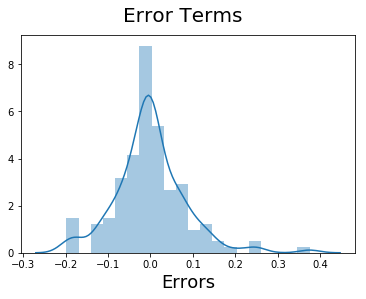

In [105]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Making Predictions using the Final Model

#### Applying scaling on Test Set

In [106]:
num_vars = ['symboling','wheelbase','carlength','carwidth', 'carheight','curbweight','cylindernumber',
                 'enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

car_master_test[num_vars] = scaler.transform(car_master_test[num_vars])

C:\Users\Varun\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Varun\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [107]:
car_master_test.describe()

,symboling,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,price
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.583871,0.112903,0.177419,0.032258,0.437764,0.559481,0.480376,0.559663,0.428470,0.232258,0.265673,0.556580,0.544314,0.209375,0.248858,0.393351,0.328405,0.363993,0.080645,0.338710,0.451613,0.096774,0.564516,0.419355,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129,0.239439
std,0.271724,0.319058,0.385142,0.178127,0.212861,0.189947,0.165440,0.215811,0.179488,0.088288,0.162820,0.228484,0.160738,0.273690,0.163376,0.192092,0.172009,0.181845,0.274512,0.477134,0.501716,0.298064,0.499868,0.497482,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000,0.233076
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,0.200000,0.067925,-0.111111,-0.060606,0.000000,0.016667,0.000000,0.027778,-0.027027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.007763
25%,0.400000,0.000000,0.000000,0.000000,0.313793,0.459350,0.358333,0.384956,0.305275,0.200000,0.177358,0.404762,0.484848,0.093750,0.107292,0.265306,0.166667,0.216216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.092342
50%,0.600000,0.000000,0.000000,0.000000,0.387931,0.547967,0.441667,0.588496,0.406129,0.200000,0.226415,0.563492,0.585859,0.125000,0.218750,0.346939,0.305556,0.351351,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.158991
75%,0.800000,0.000000,0.000000,0.000000,0.570690,0.719919,0.516667,0.699115,0.564876,0.200000,0.316038,0.746032,0.641414,0.150000,0.295833,0.540816,0.444444,0.459459,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.317243
max,1.000000,1.000000,1.000000,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,0.600000,0.932075,0.888889,0.863636,1.000000,0.662500,1.000000,0.694444,0.810811,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.112855


### Dividing into X_test and Y_test

In [108]:
y_test = car_master_test.pop('price')
X_test = car_master_test

In [109]:
## Adding a constant variable
X_test_final_model=X_test[X_train_new.columns]
X_test_final_model = sm.add_constant(X_test_final_model)

In [110]:
# Making predictions using Final model
y_pred_final_model = lm.predict(X_test_final_model)

Text(0, 0.5, 'y_pred')

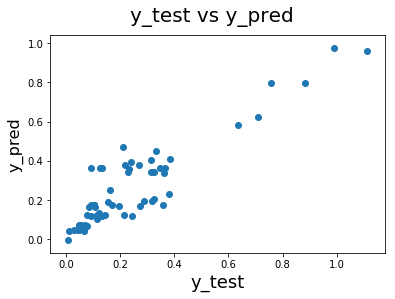

In [111]:
fig = plt.figure()
plt.scatter(y_test, y_pred_final_model)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

#### Therefore from the above graph, The equation of our best fitted line is:

### Price=0.066*aspiration+0.296*enginelocation+1.101*enginesize+0.091*rwd+0.186*dohcv+0.06*ohc+0.22*rotor